In [1]:
import sys
import os
import pandas as pd
from pprint import pprint

# Import your custom modules. Adjust the module paths as needed.
from data.load_data import loadTrainingData
from plots.feature_plots import plot_missingness


In [2]:
# Define directories and max_files manually.
directories = ['../../training_setA/', '../../training_setB/']
max_files = None  # Change this to a number (e.g., 1000) if you want to limit the number of files

dfs = []
for directory in directories:
    # Build the path pattern for .psv files in the directory.
    pattern = os.path.join(directory, "*.psv")
    print(f"\nLoading data from: {pattern} with max_files={max_files}")
    patient_data = loadTrainingData(pattern, max_files)
    
    # Concatenate all DataFrames from the current directory.
    combined_df = pd.concat(list(patient_data.values()), ignore_index=True)
    dfs.append(combined_df)

# Concatenate the combined DataFrames from all directories.
all_data = pd.concat(dfs, ignore_index=True)
print(f"\nCombined training set shape: {all_data.shape}")



Loading data from: ../../training_setA/*.psv with max_files=None


Loading PSV Files: 100%|█████████████████| 20336/20336 [00:22<00:00, 885.93it/s]



Loading data from: ../../training_setB/*.psv with max_files=None


Loading PSV Files: 100%|████████████████| 20000/20000 [00:19<00:00, 1002.51it/s]



Combined training set shape: (1552210, 35)


Average missingness: 77.84%


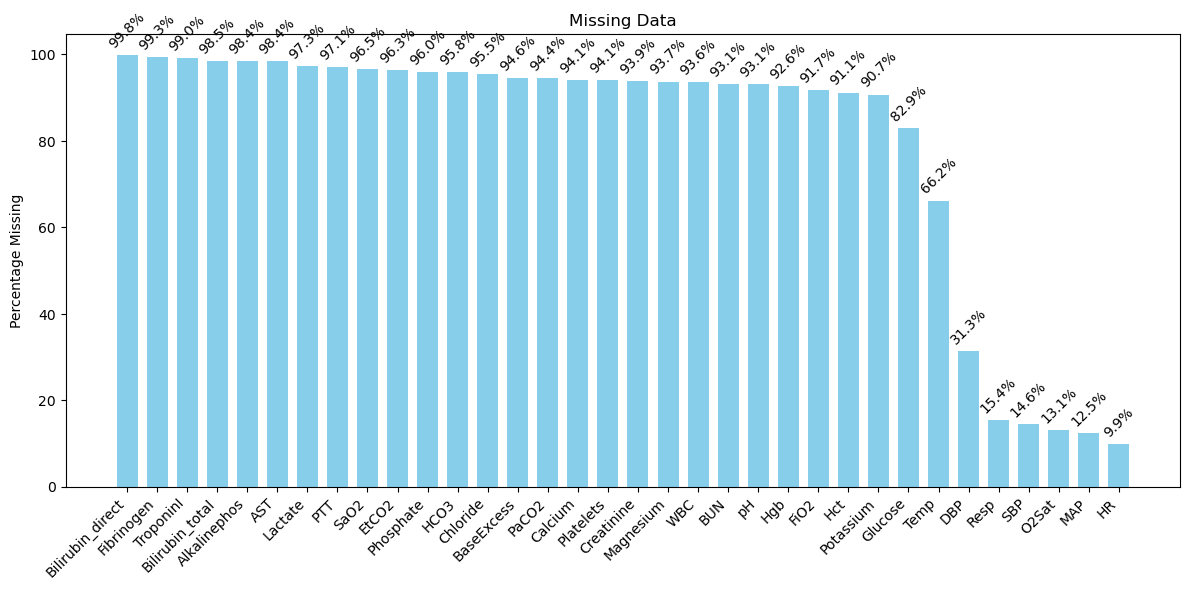

In [3]:
plot_missingness(all_data, title="Missing Data")

In [4]:
all_data.head(5)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,SepsisLabel
0,80.0,100.0,36.50,121.00,58.0,41.00,13.5,NaN,1.0,25.0,...,3.7,NaN,NaN,27.9,8.8,38.1,9.9,223.0,160.0,0
1,76.0,100.0,36.25,113.25,61.0,41.50,12.0,NaN,1.0,25.0,...,NaN,NaN,NaN,27.9,8.8,NaN,9.9,NaN,NaN,0
2,80.0,100.0,36.25,132.75,71.5,46.25,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,78.0,100.0,36.10,103.50,58.0,43.00,12.0,NaN,-3.0,NaN,...,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,74.0,100.0,36.00,128.75,69.5,44.50,12.5,NaN,-3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


Average missingness: 77.82%


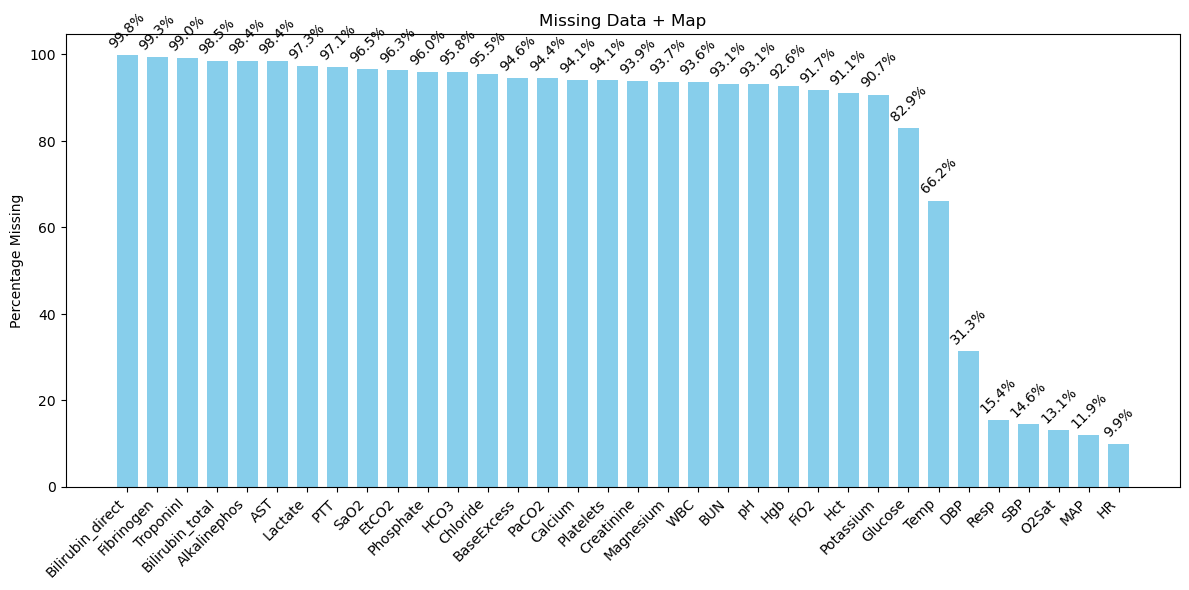

In [5]:
# Improve Missingness here
from data.clean_data import forwardFillMAP

all_data = forwardFillMAP(all_data)
plot_missingness(all_data, title="Missing Data + Map")

Average missingness: 77.35%


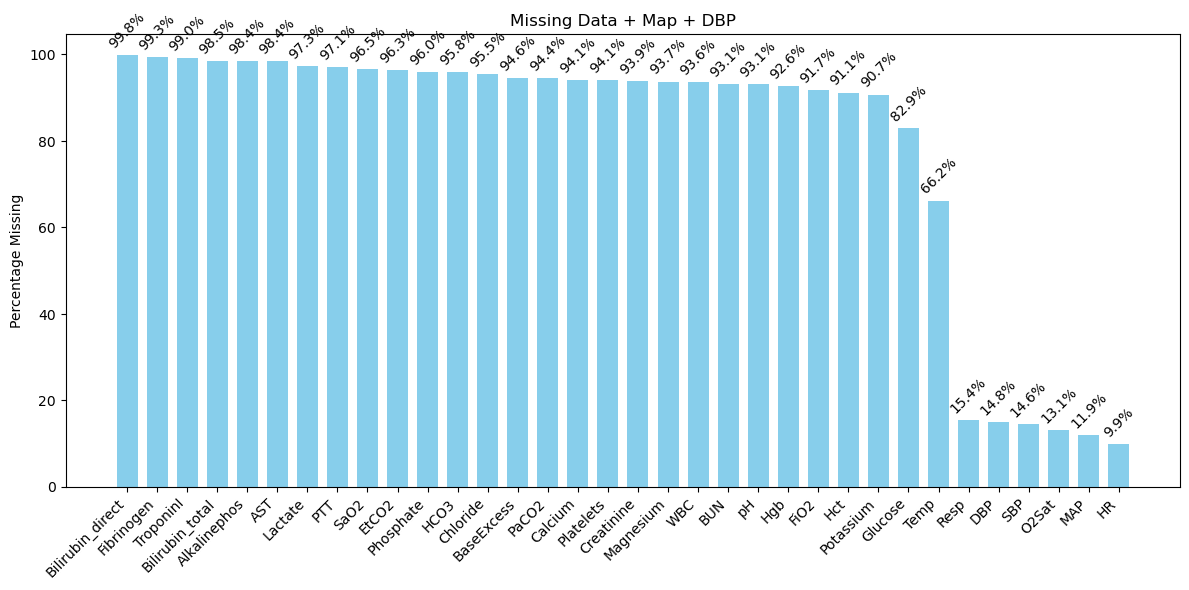

In [6]:
from data.clean_data import forwardFillDBP

all_data = forwardFillDBP(all_data)
plot_missingness(all_data, title="Missing Data + Map + DBP")

Average missingness: 77.35%


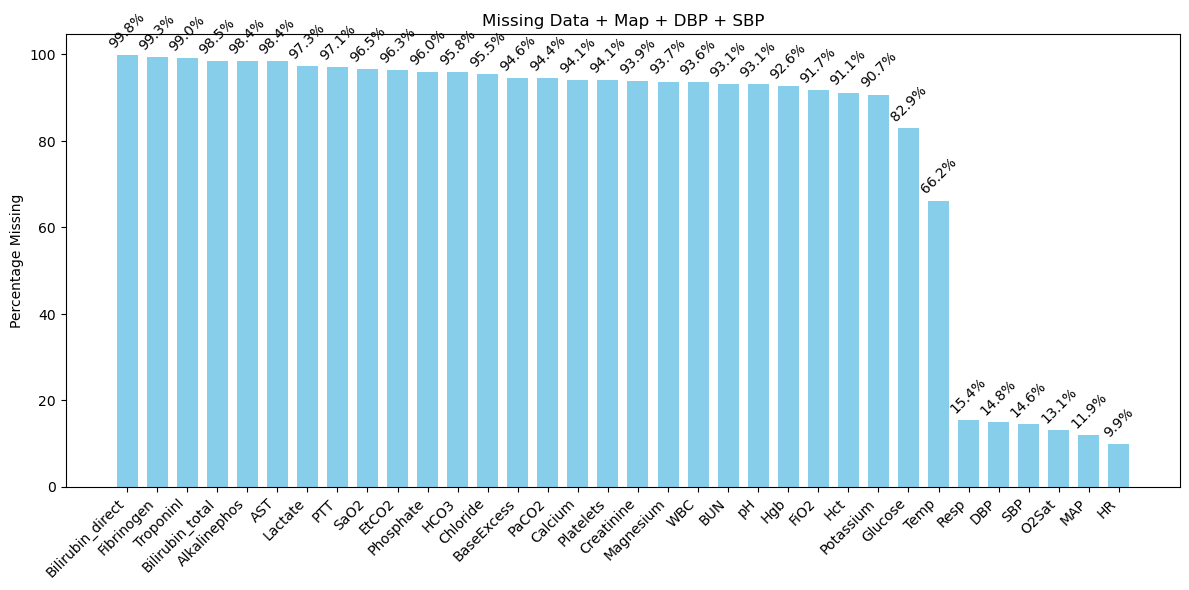

In [7]:
from data.clean_data import forwardFillSBP

all_data = forwardFillSBP(all_data)
plot_missingness(all_data, title="Missing Data + Map + DBP + SBP")

Correlation Matrix for pH, PaCO2, and HCO3:
             pH     PaCO2      HCO3
pH     1.000000 -0.426536  0.426036
PaCO2 -0.426536  1.000000  0.540772
HCO3   0.426036  0.540772  1.000000


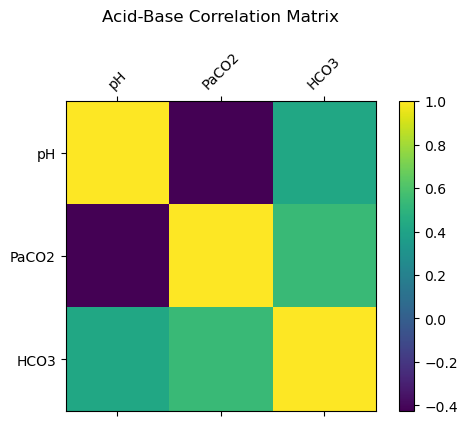

In [8]:
import matplotlib.pyplot as plt
    
df = all_data.copy()

complete = df[['pH', 'PaCO2', 'HCO3']].dropna()
corr_matrix = complete.corr()
print("Correlation Matrix for pH, PaCO2, and HCO3:")
print(corr_matrix)

# Optionally, visualize the correlation matrix.
plt.figure(figsize=(6, 4))
plt.matshow(corr_matrix, fignum=1)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar()
plt.title("Acid-Base Correlation Matrix", pad=20)
plt.show()


In [9]:
from data.correlation_data import test_pH_equation_accuracy

test_pH_equation_accuracy(df)

Descriptive statistics for True pH values:
count    17803.000000
mean         7.378663
std          0.077137
min          6.620000
25%          7.340000
50%          7.390000
75%          7.430000
max          7.680000
Name: True pH, dtype: float64

Descriptive statistics for Predicted pH values:
count    17803.000000
mean         7.376322
std          0.082952
min          6.670940
25%          7.331833
50%          7.383118
75%          7.429242
max          7.680871
Name: Predicted pH, dtype: float64

Descriptive statistics for Absolute Error:
count    17803.000000
mean         0.025713
std          0.024045
min          0.000033
25%          0.009544
50%          0.019668
75%          0.035086
max          0.459051
Name: Absolute Error, dtype: float64

Mean Absolute Error of pH prediction: 0.026


0.02571267025478573

Average missingness: 77.21%


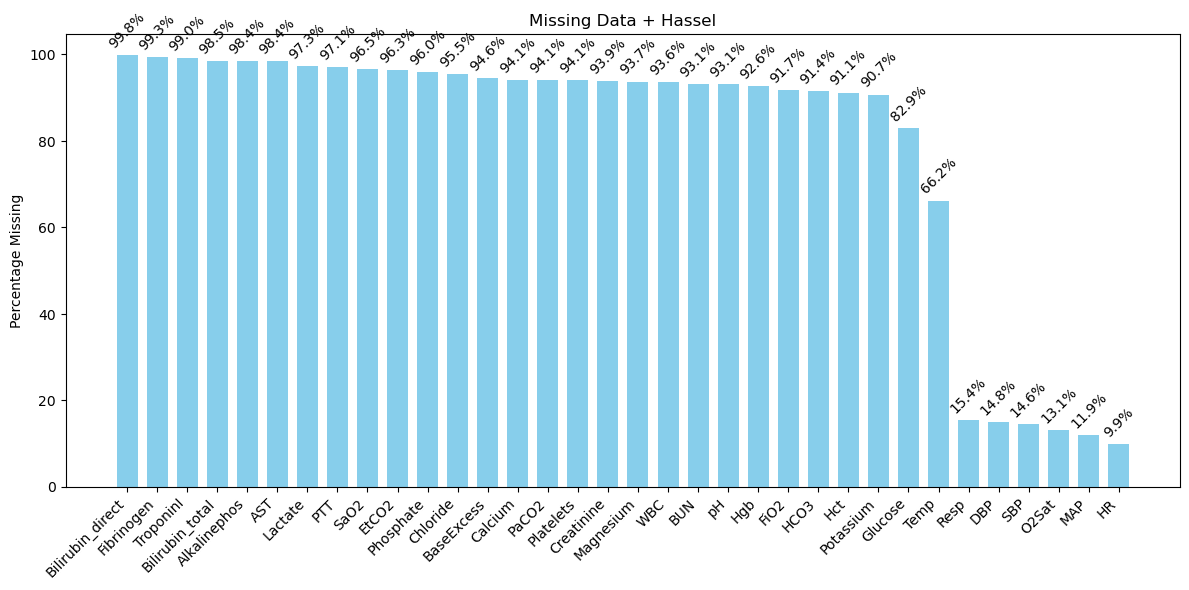

In [10]:
from data.clean_data import forwardFillHasselbalch

all_data = forwardFillHasselbalch(all_data)
plot_missingness(all_data, title="Missing Data + Hassel")